In [55]:
import pandas as pd
import os
import matplotlib.pyplot as plt

#genre_df = Spotify Dataset 1921-2020, 160k+ Tracks


genre_df = pd.read_csv("../Datasets/data_by_genres.csv")
genre_df

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.166667,5,1
1,[],0.679245,0.521473,2.298526e+05,0.401522,0.196737,0.221586,-12.679076,0.112267,112.025168,0.515920,21.682005,7,1
2,a cappella,0.621532,0.577017,1.936522e+05,0.345694,0.003799,0.127087,-12.770211,0.095324,111.813230,0.453186,43.351819,11,1
3,abstract,0.359395,0.459500,3.430185e+05,0.487000,0.791400,0.119480,-14.092000,0.043420,124.743200,0.304990,41.500000,1,1
4,abstract beats,0.353347,0.694400,2.338244e+05,0.613400,0.349403,0.102453,-6.699800,0.143453,119.398400,0.634187,58.600000,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2659,zolo,0.218600,0.560365,2.675453e+05,0.611985,0.152665,0.190792,-11.499268,0.064295,123.283566,0.596705,33.760410,9,1
2660,zouglou,0.124000,0.834000,2.951470e+05,0.674000,0.000000,0.082800,-13.455000,0.072100,119.039000,0.951000,56.000000,7,0
2661,zouk,0.233181,0.752762,2.951100e+05,0.627238,0.301195,0.083224,-10.864476,0.038110,101.681762,0.844381,42.476190,4,1
2662,zouk riddim,0.052700,0.776000,2.293330e+05,0.656000,0.565000,0.044500,-14.316000,0.034100,99.981000,0.966000,24.000000,4,1


In [56]:
genre_df["genres"].unique()

array(['432hz', '[]', 'a cappella', ..., 'zouk', 'zouk riddim', 'zydeco'],
      dtype=object)

In [57]:
#Demostrar el grado de valence en los Top 100 de géneros populares

genres_popularity=genre_df[["genres","popularity","valence"]]
genres_popularity=genres_popularity.sort_values(by="popularity", ascending=False)
genres_popularity.head(100)

,genres,popularity,valence
512,circuit,82.000000,0.556000
1118,guaracha,82.000000,0.556000
2141,russian dance,79.000000,0.326000
34,afroswing,77.625000,0.701125
2104,ritmo kombina,77.333333,0.505333
...,...,...,...
1419,k-pop girl group,63.675769,0.674597
2511,uk hip hop,63.544762,0.528890
2377,swedish tropical house,63.500000,0.223500
2384,swiss pop,63.500000,0.492500


In [58]:
genres_energy=genre_df[["genres","energy","danceability","loudness","popularity","valence"]]
genres_energy=genres_energy.sort_values(by="energy", ascending=False)
genres_energy.head(100)

,genres,energy,danceability,loudness,popularity,valence
1799,norwegian death metal,0.999500,0.204000,-5.127500,41.000000,0.027850
251,black 'n' roll,0.999500,0.204000,-5.127500,41.000000,0.027850
255,blackened crust,0.999500,0.204000,-5.127500,41.000000,0.027850
156,australian ska,0.994667,0.312667,-4.356000,44.333333,0.228900
2423,tennessee metal,0.994333,0.372000,-4.621000,46.000000,0.105967
...,...,...,...,...,...,...
1537,manchester indie,0.920000,0.402000,-2.944000,44.000000,0.297000
1849,okinawan pop,0.919500,0.481000,-3.761000,59.250000,0.633500
1504,liverpool indie,0.919000,0.429071,-5.046714,52.285714,0.574571
865,easycore,0.918714,0.549819,-3.988851,46.206494,0.565258


In [59]:
#Understand df metadata 

genres_energy.describe()

,energy,danceability,loudness,popularity,valence
count,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000
mean,0.564704,0.536555,-10.376636,40.119079,0.499293
std,0.227515,0.148557,4.994773,16.018515,0.197600
min,0.002825,0.059851,-37.613463,0.000000,0.004886
25%,0.403441,0.445851,-12.387067,33.000000,0.362073
50%,0.600476,0.544778,-9.288375,43.000000,0.508720
75%,0.733009,0.643117,-6.945217,50.879969,0.638521
max,0.999500,0.957333,-0.131500,82.000000,0.980000


Text(0, 0.5, 'Valence')

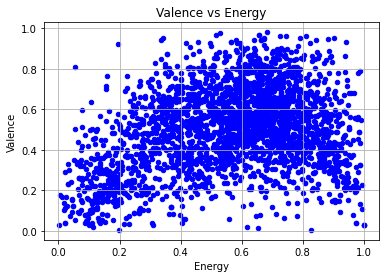

In [64]:
#Scatterplot to see relationships

valence_vs_energy = genres_energy.plot.scatter(x='energy',
                      y='valence',
                      c='Blue',
                          grid=True)


plt.title("Valence vs Energy")
plt.xlabel("Energy")
plt.ylabel("Valence")

#If considering valence's third quartile (0.63) as the treshold to define which music is happy, 

Text(0, 0.5, 'Valence')

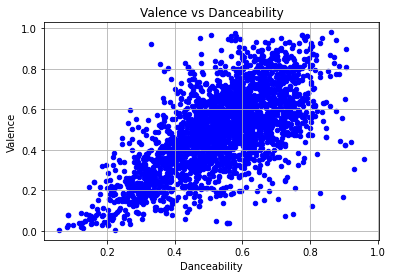

In [65]:
valence_vs_energy = genres_energy.plot.scatter(x='danceability',
                      y='valence',
                      c='Blue',
                          grid=True)


plt.title("Valence vs Danceability")
plt.xlabel("Danceability")
plt.ylabel("Valence")

In [ ]:
  # Take a copy of the dataframe to modify
    new_df = genres_energy

    # generate two new lists to store the new multi-index
    Family_ID = []
    Family_Index = []

    # iterate through the IDs, split and allocate the pieces to the appropriate list
    for i in new_df[col_to_split]:

        i = i.split(sep)

        Family_ID.append(i[0])

        if len(i)==1:
            Family_Index.append("000")
        else: 
            Family_Index.append(i[1])

    # Modify and return the dataframe including the new multi-index
    return new_df.assign(Family_ID = Family_ID,
                         Family_Index = Family_Index)